In [268]:
import sys
sys.path.append('/home/alysha/Downloads')


In [352]:
"""
Created on Mon Dec  4 10:55:54 2017

@author: alyshadesouza
"""

 
import numpy as np
import matplotlib
from neo.io import AxonIO
#import seaborn as sns
import matplotlib.pyplot as plt
#from thllib import flylib as flb
from matplotlib import pyplot as plt
import numpy as np
import scipy
#import thllib #import util
import figurefirst as fifi
from scipy import signal

import pandas as pd


In [270]:
%matplotlib inline



In [442]:
flydir = '/home/alysha/media/imager/FlyDataD/2019/'
localfile = flydir + '2019_02_25_0031.abf'

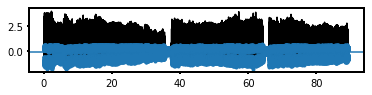

In [443]:
#flydir = '/home/alysha/media/imager/FlyDataD/lysh_ephys_ata_old/'
#flydir = '/home/alysha/media/imager/FlyDataD/brad_b2_data/'

#localfile = flydir + '2018_03_05_0024.abf'
#localfile = flydir + '2018_10_29_0009.abf'
#localfile = flydir + '2018_10_30_0012.abf'
 
r =AxonIO(localfile)
 
bl = r.read_block(lazy=False, cascade=True)
 
hutch = np.asarray(bl.segments[0].analogsignals[5])
 
fs_axon = 1.0/20000.0
 
times=np.linspace(0,len(hutch)/(1/fs_axon),len(hutch))
 
# detrend hütchens signal
hutch_det = hutch - np.mean(hutch)
 
ax1 = plt.subplot(311)
 
ax1.plot(times,hutch_det,'k')
 
#identify all relative minima
from scipy.signal import argrelmin
inds = argrelmin(hutch_det, order = 5)
ax1.plot(times[inds], hutch_det[inds], '.')
ax1.axhline(-0.08)
inds = np.array(inds)
inds = np.transpose(inds)


In [7]:
'''
abf_sp = fly.abf_times[1] #abf spike period
ca_frame_in_abf = np.int(0.02/abf_sp) #abf period in abf idxs

#get the idx's where the ca data is aquired
ep_idx = np.where(np.array(fly.abf_led_pulse)>1.0)[0]
start = ep_idx[0]+np.int(1.5*ca_frame_in_abf) #the calcium data starts at the end of one trigger period 
stop = ep_idx[-1]+np.int(1.5*ca_frame_in_abf)

#make a time array for the recording epoch
ep_times = np.array(fly.abf_times[start:stop])
ep_times -= ep_times[0]

#load this into memory since I will use it quite a bit
spike_sig = np.array(fly.abf_electrode[start:stop])
##make sure to sore this spike signal again -- messy input from B1, B2 and iii3
####i1_ca = fly.ca_camera_left_model_fits['i1']
## another way of extracting b1 activity
#F_ = np.mean(fly.ca_camera_left[:,24:34,75:100],axis = (1,2))
#F = np.percentile(F_,0.01)
#DF_F = (F_-F)/F
#b1_ca = DF_F
'''

"\nabf_sp = fly.abf_times[1] #abf spike period\nca_frame_in_abf = np.int(0.02/abf_sp) #abf period in abf idxs\n\n#get the idx's where the ca data is aquired\nep_idx = np.where(np.array(fly.abf_led_pulse)>1.0)[0]\nstart = ep_idx[0]+np.int(1.5*ca_frame_in_abf) #the calcium data starts at the end of one trigger period \nstop = ep_idx[-1]+np.int(1.5*ca_frame_in_abf)\n\n#make a time array for the recording epoch\nep_times = np.array(fly.abf_times[start:stop])\nep_times -= ep_times[0]\n\n#load this into memory since I will use it quite a bit\nspike_sig = np.array(fly.abf_electrode[start:stop])\n##make sure to sore this spike signal again -- messy input from B1, B2 and iii3\n####i1_ca = fly.ca_camera_left_model_fits['i1']\n## another way of extracting b1 activity\n#F_ = np.mean(fly.ca_camera_left[:,24:34,75:100],axis = (1,2))\n#F = np.percentile(F_,0.01)\n#DF_F = (F_-F)/F\n#b1_ca = DF_F\n"

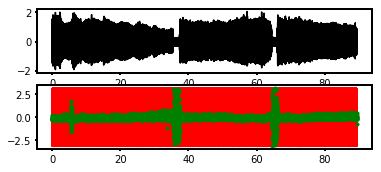

In [444]:
 
## identify the ventral flip of each wingbeat by applying a threshold
thresh = -.01 #adjust as needed
flipInds = []
flipInds = np.argwhere(hutch_det[inds]>thresh)
flipInds = inds[flipInds]
flipInds = flipInds[:,0]
 
#% now find the phase of the ventral flip 
 
#filter hütchen signal to make it more sinusoidal
 
from scipy import signal
from scipy.signal import butter, lfilter, freqz
 
def butter_lowpass(highcut, fs, order=4):
    nyq = 0.5 * fs
    #low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [high], btype='low', analog=False)
    return b, a
 
 
# Filter requirements.
order = 4
fs = 20000.0       # sample rate, Hz
lowcut = 100
highcut = 300.0  # desired cutoff frequency of the filter, Hz
 
# Get the filter coefficients so we can check its frequency response.
b, a = butter_lowpass(highcut, fs, order)
 
 
hutch_filt = signal.filtfilt(b, a, hutch_det)
 
ax2 = plt.subplot(312, sharex=ax1)
 
ax2.plot(times,hutch_filt,'k')
 
# perform a Hilbert transformation on the filtered signal to calculate instantaneous phase, amplitude, etc.
from scipy.signal import hilbert
 
hutch_analytic = hilbert(hutch_filt)
inst_phase = np.angle(hutch_analytic)
 
 
ax3 = plt.subplot(313, sharex=ax1)
 
# plot the identified ventral flip on the phase data
ax3.plot(times,hutch_analytic,'k')
ax3.plot(times,inst_phase,'r')
ax3.plot(times[flipInds],inst_phase[flipInds],'g.')

#%matplotlib inline 
#%pylab inline
#%matplotlib inline


import numpy as np
import scipy.signal as scs
import matplotlib.pyplot as plt
#from constrained_foopsi import *
#%matplotlib inline

In [389]:
import sys


In [375]:
!pwd
#%matplotlib inline  

/home/alysha/analysis_files/S193


In [ ]:
#%matplotlib inline


In [445]:
crimson = np.asarray(bl.segments[0].analogsignals[12])  #7

In [446]:
###Find crimson onset times ###

idxs= list(range(len(times)))
idxs=np.asarray(idxs)

#crimson_times = zip(times, crimson)
crimson_idxs = zip(idxs, crimson)

stimulus_diff = np.diff(crimson)
crimson_diff_times = zip (idxs, stimulus_diff)

def det_crim_onset(threshold, data):
    sortedData = sorted(data, key=lambda x: x[1])
    finalList = filter(lambda x: x[1] > threshold, sortedData)
    #finalList =filter(lambda x: x[0] < 45, finalList2)
    return finalList if len(finalList) > 2 else 'No values found'

#Spikes_1_crimson = cutoff_crimson(0.2, crimson_labeled_spikes_0)
crimson_onset_points = det_crim_onset(.5, crimson_diff_times)

#crimson_onset_times = [x[0] for x in crimson_onset_points]
crimson_onset_indx= [x[0] for x in crimson_onset_points]



In [448]:
crimson_onset_indx = sorted(crimson_onset_indx)
print(crimson_onset_indx)

for i in range(len(crimson_onset_indx)-1): 
    if crimson_onset_indx[i] - crimson_onset_indx[i+1] >= - 100:
        del crimson_onset_indx[i+1]
        #new_crimson_on.append[crimson_on[i]]

    

[45295, 165286, 285285, 405287, 525290, 645288, 765289, 885283, 1005288, 1125281, 1245280, 1365285]


In [449]:
freq = np.asarray(bl.segments[0].analogsignals[4])



In [450]:
####WSA (L-R)

L = np.asarray(bl.segments[0].analogsignals[1])
R = np.asarray(bl.segments[0].analogsignals[2])
WSA = L - R

L_times = zip(times, L)
R_times = zip(times, R)
WSA_times = zip(times, WSA)



freq = np.asarray(bl.segments[0].analogsignals[4])

freq_times = zip(times, freq)





for i in range(len(crimson_onset_indx)):
    k= str(i)
    L_clip= pd.DataFrame(L[crimson_onset_indx[i]-20000:crimson_onset_indx[i]+40000])
    L_clip.to_csv(flydir_save + '02' + k + 'L_analysis.csv', index=False)
    
for i in range(len(crimson_onset_indx)):
    k= str(i)
    R_clip= pd.DataFrame(R[crimson_onset_indx[i]-20000:crimson_onset_indx[i]+40000])
    R_clip.to_csv(flydir_save + '02' + k + 'R_analysis.csv', index=False)

for i in range(len(crimson_onset_indx)):
    k= str(i)
    WSA_clip= pd.DataFrame(WSA[crimson_onset_indx[i]-20000:crimson_onset_indx[i]+40000])
    WSA_clip.to_csv(flydir_save + '02' + k + 'WSA_analysis.csv', index=False)


df_WSA = pd.DataFrame()
df_WBF = pd.DataFrame()
df_crimson_intensity = pd.DataFrame()
df_crimson_pulse_in_sequence = pd.DataFrame()
df = pd.DataFrame()
df_fly_num = pd.DataFrame()

flydir_save  = '/home/alysha/analysis_files/S187/'


#d={} 



cols = ['fly_number', "fly_crimson_stimulus_intensity", "times", "WBF", "order_in_seqence", "L", "R", "WSA"]
d = pd.DataFrame(columns = cols, index= range(len(crimson_onset_indx)))

for i in range(len(crimson_onset_indx)):

    
    #next_off_signal = crimson_off[i+1]
    #next_on_signal = crimson_on[i+1]
    #prior_off_signal = crimson_off[i-1]
    #alt_phase = new_df[prior_off_signal: next_on_signal]
        
    #f3 = signal.resample(alt_phase, 10000)
               
    #xnew3 = np.linspace(prior_off_signal, next_on_signal, 10000, endpoint=False)
    #df_inst_phase_upon_signal[i]=f3
    #resampled_crim = signal.resample(crimson[prior_off_signal: next_on_signal],10000)
    #resampled_times = signal.resample(times[prior_off_signal: next_on_signal],10000)
    d.loc[i].fly_number= 
    
    print(crimson[crimson_onset_indx[i] + 10])
    print(crimson_onset_indx[i])
    if (crimson[crimson_onset_indx[i] + 10]) <= 4.0:
        intensity_level = 2
    elif (crimson[crimson_onset_indx[i] + 10]) >= 7.5: 
        intensity_level = 10
    elif (crimson[crimson_onset_indx[i] + 10]) <= 7.5 and (crimson[crimson_onset_indx[i] + 10]) >= 4.0:
        intensity_level = 5
    d.loc[i].fly_crimson_stimulus_intensity=intensity_level
    d.loc[i].times= times[crimson_onset_indx[i]-20000:crimson_onset_indx[i]+40000]
    d.loc[i].WBF = freq[crimson_onset_indx[i]-20000:crimson_onset_indx[i]+40000]
    d.loc[i].order_in_seqence = i
    d.loc[i].L = L[crimson_onset_indx[i]-20000:crimson_onset_indx[i]+40000]
    d.loc[i].R = R[crimson_onset_indx[i]-20000:crimson_onset_indx[i]+40000]
    d.loc[i].WSA = WSA[crimson_onset_indx[i]-20000:crimson_onset_indx[i]+40000]

In [451]:
df_WSA = pd.DataFrame()
df_WBF = pd.DataFrame()
df_crimson_intensity = pd.DataFrame()
df_crimson_pulse_in_sequence = pd.DataFrame()
df = pd.DataFrame()
df_fly_num = pd.DataFrame()

flydir_save  = '/home/alysha/analysis_files/S187/'


#d={} 



#cols = ['fly_number', "fly_crimson_stimulus_intensity", "times", "WBF", "order_in_seqence", "L", "R", "WSA"]


d_comp = pd.DataFrame()

i =0

if (crimson[crimson_onset_indx[i] + 10]) <= 4.0:
    intensity_level = 2
elif (crimson[crimson_onset_indx[i] + 10]) >= 7.5: 
    intensity_level = 10
elif (crimson[crimson_onset_indx[i] + 10]) <= 7.5 and (crimson[crimson_onset_indx[i] + 10]) >= 4.0:
    intensity_level = 5

d_comp['times']= times[crimson_onset_indx[i]-20000:crimson_onset_indx[i]+40000]
d_comp['fly_number']= 7
d_comp['crimson_stimulus_intensity']=intensity_level
d_comp['WBF'] = freq[crimson_onset_indx[i]-20000:crimson_onset_indx[i]+40000]
d_comp['order_in_seqence'] = i
d_comp['L'] = L[crimson_onset_indx[i]-20000:crimson_onset_indx[i]+40000]
d_comp['R'] = R[crimson_onset_indx[i]-20000:crimson_onset_indx[i]+40000]
d_comp['WSA'] = WSA[crimson_onset_indx[i]-20000:crimson_onset_indx[i]+40000]
d_comp['inds'] = range(len(times[crimson_onset_indx[i]-20000:crimson_onset_indx[i]+40000]))

print (len(d_comp))

for i in range(len(crimson_onset_indx)-1):

    d = pd.DataFrame()
    
    
    
    #print(crimson[crimson_onset_indx[i+1] + 10])
    #print(crimson_onset_indx[i+1])
    if (crimson[crimson_onset_indx[i+1] + 10]) <= 4.0:
        intensity_level = 2
    elif (crimson[crimson_onset_indx[i+1] + 10]) >= 7.5: 
        intensity_level = 10
    elif (crimson[crimson_onset_indx[i+1] + 10]) <= 7.5 and (crimson[crimson_onset_indx[i+1] + 10]) >= 4.0:
        intensity_level = 5
    
    d['times']= times[crimson_onset_indx[i+1]-20000:crimson_onset_indx[i+1]+40000]
    d['fly_number']= 7
    d['crimson_stimulus_intensity']=intensity_level
    d['WBF'] = freq[crimson_onset_indx[i+1]-20000:crimson_onset_indx[i+1]+40000]
    d['order_in_seqence'] = i+1
    d['L'] = L[crimson_onset_indx[i+1]-20000:crimson_onset_indx[i+1]+40000]
    d['R'] = R[crimson_onset_indx[i+1]-20000:crimson_onset_indx[i+1]+40000]
    d['WSA'] = WSA[crimson_onset_indx[i+1]-20000:crimson_onset_indx[i+1]+40000]
    d['inds'] = d['inds'] = range(len(times[crimson_onset_indx[i+1]-20000:crimson_onset_indx[i+1]+40000]))
    
    s = d['WBF']*100
    if (s < 150).any():
        #non_flight_epochs.append(i)
        print('non_flight_epoch')
    else: #d_comp['WBF'].contains 
        d_comp = d_comp.append(d)
    
    


60000
non_flight_epoch
non_flight_epoch


In [452]:
d_comp

,times,fly_number,crimson_stimulus_intensity,WBF,order_in_seqence,L,R,WSA,inds
0,1.264751,7,2,1.994629,0,431.732178,1.886597,429.845581,0
1,1.264801,7,2,1.993713,0,431.701660,1.885681,429.815979,1
2,1.264851,7,2,1.994324,0,431.732178,1.886597,429.845581,2
3,1.264901,7,2,1.994324,0,431.793213,1.886902,429.906311,3
4,1.264951,7,2,1.994324,0,431.701660,1.885986,429.815674,4
5,1.265001,7,2,1.993713,0,431.701660,1.885986,429.815674,5
6,1.265051,7,2,1.994324,0,431.732178,1.886597,429.845581,6
7,1.265101,7,2,1.994324,0,431.762695,1.886597,429.876099,7
8,1.265151,7,2,1.993408,0,431.671143,1.885986,429.785156,8
9,1.265201,7,2,1.994629,0,431.793213,1.886597,429.906616,9


In [453]:
flydir_save  = '/home/alysha/analysis_files/S187/'

In [454]:
d_comp.to_csv(flydir_save + 's187_general_df_fly_07.csv', index=False)